# 머신러닝
---

### 목차
1. 머신러닝 개요


2. K-최근접 이웃 알고리즘
    - K-최근접 이웃 알고리즘
    - 적용
    
    
3. 서포트 벡터 머신
    - 서포트 벡터 머신 알고리즘
    - 적용


## 0. 머신러닝의 개요

- 머신러닝 : 주어진 데이터를 분석하여 규칙성, 패턴 등을 찾고, 이를 이용하여 의미있는 정보를 추출하는 과정을 말함.

- 학습,훈련(train) : 데이터로부터 규칙성을 찾아내는 과정

- 모델 : 학습, 훈련에 의해 결정된 규칙
- 예측, 추론 : 새로운 데이터를 학습된 모델에 입력으로 전달하고 결과를 판단하는 과정
- 머신러닝은 크게 지도학습과 비지도 학습으로 구분한다.
- 지도학습 : 정답을 알고 있는 데이터를 이용하여 학습을 진행하는 방식
- 비지도학습 : 정답 라벨이 없는 데이터를 비슷한 특징끼리 군집화 하여 새로운 데이터에 대한 결과를 예측하는 방법



## 1. K-최근접 이웃 알고리즘

### A. KNN알고리즘 이론

- K-최근접 이웃 알고리즘 : 분류 또는 회귀에 사용되는 지도학습 알고리즘
- K-최근접이 분류 태스크에 적용되면 : 특징 공간에서 테스트 데이터와 가장 가까운 k개의 훈련데이터를 찾고, K개의 훈련 데이터를 다수결로 판정하여 테스트 데이터의 클래스를 지정함
- K-최근접이 회귀 태스크에 적용되면 : 테스트 데이터에 인접한 k개의 훈련 데이터의 평균을 테스트 데이터 값으로 설정

> Q1. 아래의 코드를 실행시켜보고 위의 알고리즘을 바탕으로 의미를 분석해보세요.

result:  [[0.]]

neighbours:  [[0. 0. 0.]]

distance:  [[196. 257. 400.]]



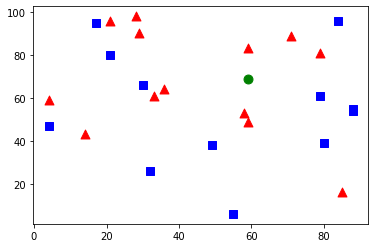

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)

# Label each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0,2,(25,1)).astype(np.float32)

# Take Red neighbours and plot them
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')

# Take Blue neighbours and plot them
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)
print( "result:  {}\n".format(results) )
print( "neighbours:  {}\n".format(neighbours) )
print( "distance:  {}\n".format(dist) )
plt.show()

# 10 new-comers
newcomers = np.random.randint(0,100,(10,2)).astype(np.float32)
ret, results,neighbours,dist = knn.findNearest(newcomer, 3)
# The results also will contain 10 labels.

result:  [[0.]]

neighbours:  [[0. 0. 0.]]

distance:  [[197. 320. 405.]]



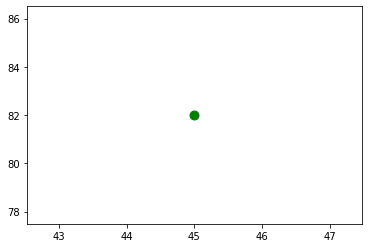

In [2]:
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)
print( "result:  {}\n".format(results) )
print( "neighbours:  {}\n".format(neighbours) )
print( "distance:  {}\n".format(dist) )
plt.show()

### B. 핸드라이팅 Digits을 분류하는 KNN알고리즘을 실행시켜 봅시다.

> Q2. 아래의 소스코드를 실행시키거나, 직접 주석을 달아봅시다. (샘플 데이터는 opencv/samples/data 아래에 제공되고 있다고 명시하고 있습니다.)

dimensions of responses must be (n,1), where n length of samples (n,m).

In [3]:
import numpy as np
import cv2 as cv
import os

path = os.getenv('HOME') +'/digits.png'
img = cv.imread(path)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array: its size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare the training data and test data
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

# Initiate kNN, train it on the training data, then test it with the test data with k=1
knn = cv.ml.KNearest_create()
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)

# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)

accuracy = correct*100.0/result.size
print( accuracy )

91.76


In [4]:
# Save the data
np.savez('knn_data.npz',train=train, train_labels=train_labels)
# Now load the data
with np.load('knn_data.npz') as data:
    print( data.files )
    train = data['train']
    train_labels = data['train_labels']

['train', 'train_labels']


### OCR을 영어 알파벳에 적용해보기

In [5]:
import cv2 as cv
import numpy as np
# Load the data and convert the letters to numbers
data= np.loadtxt(os.getenv('HOME') +'/letter-recognition.data', dtype= 'float32', delimiter = ',',
                    converters= {0: lambda ch: ord(ch)-ord('A')})
# Split the dataset in two, with 10000 samples each for training and test sets
train, test = np.vsplit(data,2)
# Split trainData and testData into features and responses
responses, trainData = np.hsplit(train,[1])
labels, testData = np.hsplit(test,[1])
# Initiate the kNN, classify, measure accuracy
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, result, neighbours, dist = knn.findNearest(testData, k=5)
correct = np.count_nonzero(result == labels)
accuracy = correct*100.0/10000
print( accuracy )

93.06


## SVM(서포트 벡터 머신)

### A. 서포트 벡터 머신 알고리즘


- 서포트 벡터 머신은 두 개의 클래스로 구성된 데이터를 가장 여유있게 분리하는 초평면을 찾는 머신러닝 알고리즘이다.
- ex) 2차원 공간상의 경우는 두 클래스의 데이터를 분리하는 직선 형태로, 3차원 공간의 경우는 3차원 공간에서의 평면의 방정식이 된다.
- SVM 알고리즘은 지도학습의 일종이며, 분류와 회귀에 사용된다.

### B. 위와 동일하게, 핸드라이팅 Digits을 분류하는 SVM을 적용해 봅시다.

[이 튜토리얼을 참고하였습니다.](https://docs.opencv.org/master/dd/d3b/tutorial_py_svm_opencv.html)

OCR of Hand-written Digits
In kNN, we directly used pixel intensity as the feature vector. This time we will use Histogram of Oriented Gradients (HOG) as feature vectors.

이번에는 특징 벡터를 추출하기 위해 HOG를 사용합니다.
Here, before finding the HOG, we deskew the image using its second order moments. So we first define a function deskew() which takes a digit image and deskew it. Below is the deskew() function:

> Q4.아래의 코드를 한 번 분석해보세요.

In [6]:
def deskew(img):
    m = cv.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv.warpAffine(img,M,(SZ, SZ),flags=affine_flags)
    return img

### HOG 함수 적용하기

Next we have to find the HOG Descriptor of each cell. For that, we find Sobel derivatives of each cell in X and Y direction. Then find their magnitude and direction of gradient at each pixel. This gradient is quantized to 16 integer values. Divide this image to four sub-squares. For each sub-square, calculate the histogram of direction (16 bins) weighted with their magnitude. So each sub-square gives you a vector containing 16 values. Four such vectors (of four sub-squares) together gives us a feature vector containing 64 values. This is the feature vector we use to train our data.

In [7]:
def hog(img):
    gx = cv.Sobel(img, cv.CV_32F, 1, 0)
    gy = cv.Sobel(img, cv.CV_32F, 0, 1)
    mag, ang = cv.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist

## 학습에 적용

In [8]:
import cv2 as cv
import numpy as np

SZ=20
bin_n = 16 # Number of bins
affine_flags = cv.WARP_INVERSE_MAP|cv.INTER_LINEAR

def deskew(img):
    m = cv.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv.warpAffine(img,M,(SZ, SZ),flags=affine_flags)
    return img

def hog(img):
    gx = cv.Sobel(img, cv.CV_32F, 1, 0)
    gy = cv.Sobel(img, cv.CV_32F, 0, 1)
    mag, ang = cv.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist

img = cv.imread(cv.samples.findFile(os.getenv('HOME') + '/digits.png'),0)
if img is None:
    raise Exception("we need the digits.png image from samples/data here !")
cells = [np.hsplit(row,100) for row in np.vsplit(img,50)]

# First half is trainData, remaining is testData
train_cells = [ i[:50] for i in cells ]
test_cells = [ i[50:] for i in cells]
deskewed = [list(map(deskew,row)) for row in train_cells]
hogdata = [list(map(hog,row)) for row in deskewed]
trainData = np.float32(hogdata).reshape(-1,64)
responses = np.repeat(np.arange(10),250)[:,np.newaxis]
svm = cv.ml.SVM_create()
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setType(cv.ml.SVM_C_SVC)
svm.setC(2.67)
svm.setGamma(5.383)
svm.train(trainData, cv.ml.ROW_SAMPLE, responses)
svm.save('svm_data.dat')
deskewed = [list(map(deskew,row)) for row in test_cells]
hogdata = [list(map(hog,row)) for row in deskewed]
testData = np.float32(hogdata).reshape(-1,bin_n*4)
result = svm.predict(testData)[1]
mask = result==responses
correct = np.count_nonzero(mask)
print(correct*100.0/result.size)

93.84
